# Classifier evaluation metrics 

## Read the data

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
Data=pd.read_csv ('DataExample.csv')
Data.head()


,ClassTissuePost,ClassTissuePre,ClassTissueFlair,ClassTumorPost,ClassTumorPre,ClassTumorFlair,ClassEdemaPost,ClassEdemaPre,ClassEdemaFlair
0,0.087963,0.858711,0.829803,1.950291,1.174979,1.558614,0.988165,1.061558,1.633107
1,0.015574,0.015591,0.060458,1.660350,1.477316,1.730667,0.911867,1.104190,1.713640
2,0.412343,0.238170,0.048322,1.316141,1.230522,1.613405,1.028967,1.079044,1.129424
3,0.024979,0.163558,0.065036,1.498414,1.289566,2.034284,1.035253,1.110987,1.484037
4,0.026786,0.109592,0.079496,2.069021,1.022214,1.403051,1.096287,1.177913,1.494370


In [2]:
ClassBrainTissuepost=(Data['ClassTissuePost'].values)
ClassBrainTissuepost= (np.asarray(ClassBrainTissuepost))
ClassBrainTissuepost=ClassBrainTissuepost[~np.isnan(ClassBrainTissuepost)]
ClassBrainTissuepre=(Data[['ClassTissuePre']].values)
ClassBrainTissuepre= (np.asarray(ClassBrainTissuepre))
ClassBrainTissuepre=ClassBrainTissuepre[~np.isnan(ClassBrainTissuepre)]
ClassTUMORpost=(Data[['ClassTumorPost']].values)
ClassTUMORpost= (np.asarray(ClassTUMORpost))
ClassTUMORpost=ClassTUMORpost[~np.isnan(ClassTUMORpost)]
ClassTUMORpre=(Data[['ClassTumorPre']].values)
ClassTUMORpre= (np.asarray(ClassTUMORpre))
ClassTUMORpre=ClassTUMORpre[~np.isnan(ClassTUMORpre)]
X_1 = np.stack((ClassBrainTissuepost,ClassBrainTissuepre)) # we only take the first two features.
X_2 = np.stack((ClassTUMORpost,ClassTUMORpre))
X=np.concatenate((X_1.transpose(), X_2.transpose()),axis=0)
y =np.zeros((np.shape(X))[0])
y[np.shape(X_1)[1]:]=1

## Split training testing 

In [3]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## train a logistic regression model on the training set


In [4]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

## make class predictions for the testing set


In [5]:
y_pred_class = logreg.predict(X_test)

## calculate accuracy


In [6]:
# Classification accuracy: percentage of correct predictions

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.9304


## Confusion matrix 

In [7]:
print(metrics.confusion_matrix(y_test, y_pred_class))


[[1195   68]
 [ 106 1131]]


In [8]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


##  Classification Accuracy
Overall, how often is the classifier correct


In [9]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9304
0.9304


##  Classification Error
Overall, how often is the classifier incorrect?


In [10]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.0696
0.0696


## Sensitivity
When the actual value is positive, how often is the prediction correct?


In [11]:
 
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.9143088116410671
0.9143088116410671


## Specificity
When the actual value is negative, how often is the prediction correct?


In [12]:
print(TN / float(TN + FP))


0.946159936658749


## False Positive Rate

When the actual value is negative, how often is the prediction incorrect?


In [13]:

print(FP / float(TN + FP))


0.053840063341250986


## Precision
When a positive value is predicted, how often is the prediction correct?


In [14]:

print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.9432860717264387
0.9432860717264387


## ROC Curves and Area Under the Curve (AUC)

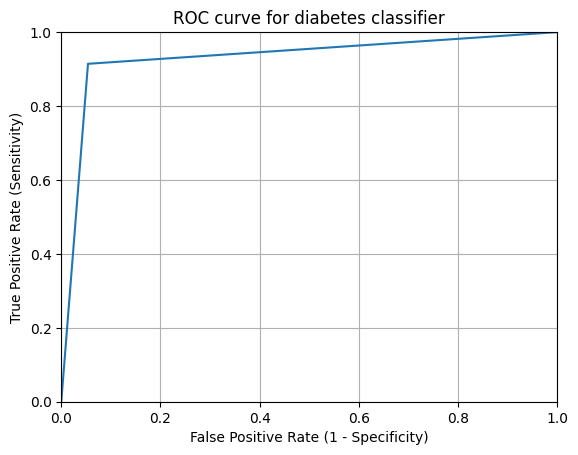

In [15]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [16]:

# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])
    
evaluate_threshold(0.5)


Sensitivity: 0.9143088116410671
Specificity: 0.946159936658749


## AUC 
The percentage of the ROC plot that is underneath the curve:


In [17]:

print(metrics.roc_auc_score(y_test, y_pred_class))


0.9302343741499081


### calculate cross-validated AUC

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

np.float64(0.9782064)